IMPORTING NECESSARY LIBRARIES

In [67]:
#File handling Libraries
import os
import pickle

#Numerical calculations
import numpy as np
from scipy.stats import skew

#Pandas Library
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")

DATA EXTRACTION

In [153]:
#data extraction from multiple csv files
path = r"C:\Users\abina\Desktop\abi\final project files\capstone 5\Data"

#getting the list of files from Data folder
file_list = os.listdir(path)

#Creating a single Dataframe combining all files using list comprehension
df = pd.concat([pd.read_csv(path+"\\"+file) for file in file_list],ignore_index=True).fillna(0)
df.sort_values(by=["month","town"], inplace=True, ignore_index=True)

DATA PRE PROCESSING

In [167]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0


In [168]:
df.shape

(927769, 11)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927769 entries, 0 to 927768
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927769 non-null  object 
 1   town                 927769 non-null  object 
 2   flat_type            927769 non-null  object 
 3   block                927769 non-null  object 
 4   street_name          927769 non-null  object 
 5   storey_range         927769 non-null  object 
 6   floor_area_sqm       927769 non-null  float64
 7   flat_model           927769 non-null  object 
 8   lease_commence_date  927769 non-null  int64  
 9   resale_price         927769 non-null  float64
 10  remaining_lease      927769 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.9+ MB


In [170]:
df[df.duplicated()].count()

month                  1899
town                   1899
flat_type              1899
block                  1899
street_name            1899
storey_range           1899
floor_area_sqm         1899
flat_model             1899
lease_commence_date    1899
resale_price           1899
remaining_lease        1899
dtype: int64

In [171]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [172]:
df.shape

(925870, 11)

In [173]:
#type-casting month column to datetime dtype
df['month']=pd.to_datetime(df['month'],format="%Y-%m")

In [174]:
#split the month column by year and month
df['year']=df['month'].dt.year
df['month']=df['month'].dt.month

EXPLORATORY DATA ANALYSIS

In [78]:
#Calculating the skewness of continuous variables
print("Skewness of:\n")
area = skew(df['floor_area_sqm'])
price = skew(df['resale_price'])
print("Floor area:", area)
print("Resale price:", price)

Skewness of:

Floor area: 0.3657360333754773
Resale price: 0.9432643436589611


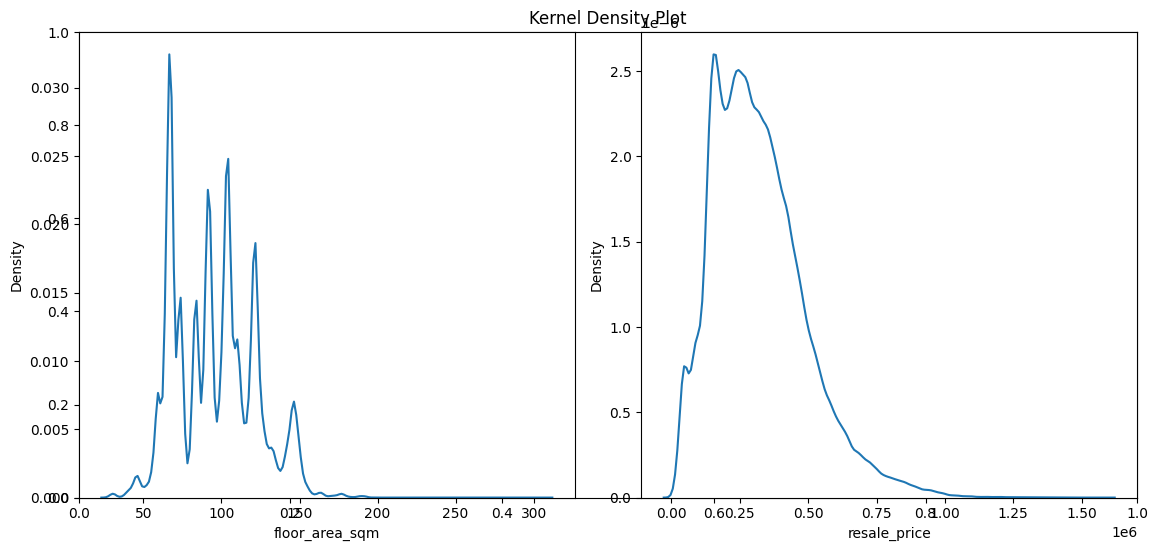

In [79]:
#Kernel Density plots
plt.figure(figsize=(12, 6))
plt.title("Kernel Density Plot")

plt.subplot(121)
sns.kdeplot(df['floor_area_sqm'])

plt.subplot(122)
sns.kdeplot(df['resale_price'])

plt.tight_layout()
plt.show()

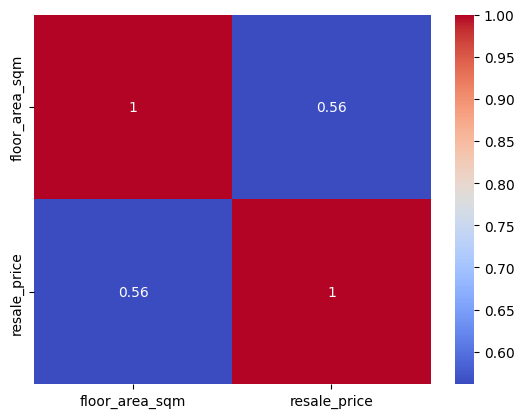

In [80]:
#Heatmap for Floor area and resale price
correlation_matrix = df[['floor_area_sqm','resale_price']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

FEATURE ENGINEERING

In [175]:
df1 = df.copy()

In [176]:
df1.drop(columns=['month','block','street_name','remaining_lease'],inplace=True)

In [177]:
df1.shape

(925870, 8)

In [178]:
df1.nunique()

town                     27
flat_type                 8
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      55
resale_price           9529
year                     35
dtype: int64

In [179]:
df1.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [180]:
df1.loc[df1['flat_type'].str.contains('MULTI GENERATION'), 'flat_type'] = 'MULTI-GENERATION'

In [181]:
df1.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [182]:
df1.flat_model.unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [183]:
df1['flat_model'] = df1['flat_model'].str.title()

In [184]:
df1.flat_model.unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Model A-Maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-Room', 'Improved-Maisonette', 'Multi Generation',
       'Premium Apartment', 'Adjoined Flat', 'Premium Maisonette',
       'Model A2', 'Dbss', 'Type S1', 'Type S2', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [185]:
df1.nunique()

town                     27
flat_type                 7
storey_range             25
floor_area_sqm          212
flat_model               21
lease_commence_date      55
resale_price           9529
year                     35
dtype: int64

In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925870 entries, 0 to 925869
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 925870 non-null  object 
 1   flat_type            925870 non-null  object 
 2   storey_range         925870 non-null  object 
 3   floor_area_sqm       925870 non-null  float64
 4   flat_model           925870 non-null  object 
 5   lease_commence_date  925870 non-null  int64  
 6   resale_price         925870 non-null  float64
 7   year                 925870 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 53.0+ MB


In [187]:
df1.head(2)

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,Improved,1977,9000.0,1990
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,Improved,1977,6000.0,1990


ENCODING

In [188]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = df1.select_dtypes(include=['object']).columns.tolist()

ohe = OneHotEncoder(sparse_output=False)

one_hot_encoded = ohe.fit_transform(df1[categorical_columns])

df_ohe = pd.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df1, df_ohe], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [191]:
df_encoded.shape

(925870, 84)

In [192]:
df_encoded.head(2)

,floor_area_sqm,lease_commence_date,resale_price,year,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,31.0,1977,9000.0,1990,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31.0,1977,6000.0,1990,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


MODEL SELECTION

In [193]:
df_r = df_encoded.copy()

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [92]:
def model_evaluation(df,model):
    X= df.drop(columns=['resale_price'])
    y= df['resale_price']

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model1 = model()
    model1.fit(X_train,y_train)
    y_pred = model1.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Name: {model.__name__} // Root Mean Squared Error: {rmse:.2f} // R-squared (R2): {r2:.3f}")

    #Saving the model
    model_name = model.__name__
    with open(f'{model_name}.pkl', 'wb') as file:
        pickle.dump(model1, file)


In [93]:
model_evaluation(df_r, LinearRegression)
model_evaluation(df_r, DecisionTreeRegressor)
model_evaluation(df_r, RandomForestRegressor)
model_evaluation(df_r, AdaBoostRegressor)
model_evaluation(df_r, ExtraTreesRegressor)
model_evaluation(df_r, GradientBoostingRegressor)
model_evaluation(df_r, XGBRegressor)

Name: LinearRegression // Root Mean Squared Error: 63771.03 // R-squared (R2): 0.859
Name: DecisionTreeRegressor // Root Mean Squared Error: 30534.61 // R-squared (R2): 0.968
Name: RandomForestRegressor // Root Mean Squared Error: 26732.30 // R-squared (R2): 0.975
Name: AdaBoostRegressor // Root Mean Squared Error: 122391.57 // R-squared (R2): 0.482
Name: ExtraTreesRegressor // Root Mean Squared Error: 28030.89 // R-squared (R2): 0.973
Name: GradientBoostingRegressor // Root Mean Squared Error: 49245.34 // R-squared (R2): 0.916
Name: XGBRegressor // Root Mean Squared Error: 28924.32 // R-squared (R2): 0.971


RESALE PRICE PREDICTION USING USER DATA

In [207]:
X= df_r.drop(columns=['resale_price'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

**Selecting Random Forest Regressor model for resale price prediction as that gives the highest accuracy**

In [201]:
with open("RandomForestRegressor.pkl", 'rb') as file:
    model = pickle.load(file)

In [206]:
#predicting user data
#floor_area_sqm, lease_commence_date, year, town, flat_type, storey_range, flat_model
user_data= np.array([[45.0,1978,2022,'ANG MO KIO','2 ROOM','10 TO 12','Improved']])
user_data_ohe = ohe.transform(user_data[:, [3,4,5,6]])
user_data = np.concatenate((user_data[:, [0,1,2]], user_data_ohe), axis=1)
user_data1 = scaler.transform(user_data)
pred = model.predict(user_data1)
print(f"Predicted resale price: {pred[0]:.2f} SGD")

Predicted resale price: 266293.96 SGD


PICKLING STANDARD SCALER AND ONE HOT ENCODER

In [208]:
with open('scaler.pkl', 'wb') as file:
        pickle.dump(scaler, file)
with open('onehot_encoder.pkl', 'wb') as f2:
        pickle.dump(ohe, f2)        